# Run and Plot FluSight Forecasts (2024-2025 season)<a class="anchor" id="top"></a>

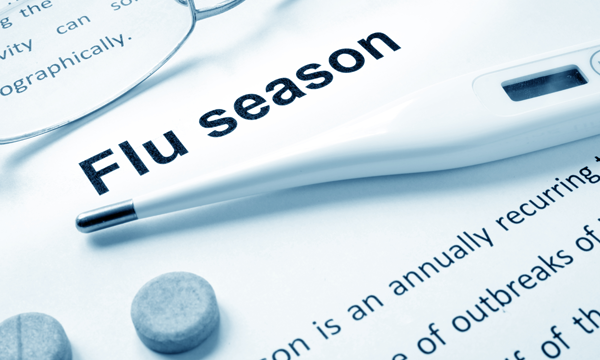

## Table of contents

* [Run forecast](#run-forecast)
* [Import forecast files](#import-forecast)
* [Plot fore quantiles](#plot-fore-quantiles)

In [1]:
import gc
import importlib
import os
from pathlib import Path
import sys
import time

import IPython.display
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib as mpl
# from matplotlib import ticker
# from matplotlib import dates
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import pandas as pd

# MANUALLY ADD RTREND LIBRARY PATH
sys.path.append("../../Rtrend_project/")
# Move to project root directory
if os.path.basename(os.getcwd()) != "programs":
    os.chdir("..")  # Move to project root
print(f"Working directory: {os.getcwd()}")

from rtrend_forecast.reporting import get_rtrend_logger, SUCCESS
import rtrend_forecast.visualization as vis
import utils.flusight_tools as fst
import utils.truth_data_structs as tds

# ------

_LOGGER = get_rtrend_logger().getChild("jupyter")
# ---
# %matplotlib notebook
%matplotlib widget
mpl.rcParams["pdf.fonttype"] = 42

main_rc = mpl.rcParams.copy()

main_rc["patch.linewidth"] = 0.
aggr_ref_tlabel = pd.Timestamp("2023-10-08")  # Sunday 00am, turns epiweek

# Define and reset the matplotlib figures in the notebook
try: 
    for _fig in mpl_figs: plt.close(_fig)
except NameError: pass
finally: mpl_figs = list()
plt.close("all")
gc.collect()
fig_kwargs = dict(num=1, clear=True) # Based on: https://stackoverflow.com/questions/28757348/how-to-clear-memory-completely-of-all-matplotlib-plots


Working directory: /Users/pventura/NonCloudStorage/Flu_forecast/programs


# Run forecast <a class="anchor" id="run-forecast"></a>

[Back to top](#top)

In [83]:
do_run = True
do_export = True
now_str = pd.Timestamp.now().isoformat()
# now_str = (pd.Timestamp.now() - pd.Timedelta("3d")).isoformat()
# now_str = "2024-04-22"  # Date of the last forecast done
print(f"Now str = {now_str}")

if do_run:
    xt0 = time.time()
    cmd = f"source activate rtrend_dev && python flusight_forecast.py --now {now_str}"
    cmd += "" if do_export else " --no-export"
    os.system(cmd)
    xtf = time.time()
    print("----------")
    print(f"Total script execution time = {xtf - xt0:0.2f}s")
else:
    print("Skipped")

Now str = 2024-12-18T15:06:30.740367
[Alabama_2024-12-14] WARNING: 13 negative values were found in the preprocessed past incidence series  will be handled with method 'shift'. (`self.inc.past_gran_sr`). 
	 – The minimum is -0.04081115801483426.
	 – The sum is -0.31739827858171643.
[Idaho_2024-12-14] WARNING: 23 negative values were found in the preprocessed past incidence series  will be handled with method 'shift'. (`self.inc.past_gran_sr`). 
	 – The minimum is -0.005774582537823217.
	 – The sum is -0.09049390867884052.
[Alabama_2024-12-14] Level 15: Forecast concluded
[Arkansas_2024-12-14] Level 15: Forecast concluded
[Connecticut_2024-12-14] Level 15: Forecast concluded
[Florida_2024-12-14] Level 15: Forecast concluded
[Idaho_2024-12-14] Level 15: Forecast concluded
[Delaware_2024-12-14] WARNING: 32 negative values were found in the preprocessed past incidence series  will be handled with method 'shift'. (`self.inc.past_gran_sr`). 
	 – The minimum is -0.02145874980438467.
	 – The s

[South-Dakota_2024-12-14] Level 15: Forecast concluded
[West-Virginia_2024-12-14] WARNING: There are 5 missing values in forecast region-of-interest. 
Dates: ['2024-09-07', '2024-09-14', '2024-09-21', '2024-09-28', '2024-10-05'].
Handled with method: fill with zeros.
[West-Virginia_2024-12-14] WARNING: 50 negative values were found in the preprocessed past incidence series  will be handled with method 'shift'. (`self.inc.past_gran_sr`). 
	 – The minimum is -0.02078845524064754.
	 – The sum is -0.43350248825115884.
[Vermont_2024-12-14] Level 15: Forecast concluded
[Ohio_2024-12-14] Level 15: Forecast concluded
[Utah_2024-12-14] Level 15: Forecast concluded
[West-Virginia_2024-12-14] Level 15: Forecast concluded
[Puerto-Rico_2024-12-14] Level 15: Forecast concluded
[Virginia_2024-12-14] Level 15: Forecast concluded
[Wisconsin_2024-12-14] Level 15: Forecast concluded
[Washington_2024-12-14] Level 15: Forecast concluded
[Wyoming_2024-12-14] Level 15: Forecast concluded
[__main__] Level 15:

# Import forecast files <a class="anchor" id="import-forecast"></a>

In [84]:
# -------------------------------
# PARAMETERS
# -------------------------------
truth_data_file = Path("hosp_data/truth_latest.csv")
# truth_data_file = Path("hosp_data/season_2024-2025/truth_2024-11-27.csv")
# now = pd.Timestamp(now_str)
now = pd.Timestamp.now()

# # --- Select output 
output_dir = Path("outputs/latest/")
flusight_output_file = Path("forecast_out/latest.csv")
now = pd.Timestamp(now_str)

# # # # # # # # # # # Past !! 
# output_dir = Path("outputs/flusight_2024-12-14/")
# flusight_output_file = Path("forecast_out/2024-12-14-CEPH-Rtrend_fluH.csv")
# # truth_data_file = Path("hosp_data/truth_latest.csv")

# # # Experimental
# output_dir = Path("outputs/tests/rtrend_refactor_after/")
# flusight_output_file = Path("forecast_out/tests/rtrend_refactor_after.csv")
# now = pd.Timestamp("2024-11-26")

# -------------------------------
# IMPORTS
# -------------------------------
importlib.reload(fst)
importlib.reload(tds)


obj = fst.FluSightGeneralOutputs(output_dir)
# truth = tds.FluDailyTruthData(truth_data_file)
truth = tds.FluWeeklyTruthData(truth_data_file, pop_data_path="aux_data/locations.csv")
dates = fst.FluSightDates(now)

fsobj = fst.FluSight2023Fore(flusight_output_file)

# TODO: The objects to hold the truth, forecast and hubverse forecast data should be revised!
#  They can have better patterns and be more compatible between one another.
    
obj.q_df

2024-12-15    2024-12-22    2024-12-29    2025-01-05  \
location_name quantile                                                          
Alabama       0.010       28.007013    229.788411    264.493261    266.218331   
              0.025       28.615861    236.334543    278.497275    283.822159   
              0.050       29.123235    242.575236    292.041609    303.252025   
              0.100       29.732083    250.693211    311.167050    328.808425   
              0.150       30.188719    256.426531    325.327843    348.616283   
...                             ...           ...           ...           ...   
US            0.850     1471.116975  13166.942235  20319.077532  25815.448097   
              0.900     1493.389847  13488.411265  21299.404017  27399.961681   
              0.950     1526.732728  13968.927462  22779.516772  29785.081644   
              0.975     1552.246000  14364.320416  24001.376402  31733.035447   
              0.990     1581.560099  14763.319856  25212.271303  33640.210440   

                          2025-01-12    2025-01-19    2025-01-26  
location_name quantile                                            
Alabama       0.010       232.782422    182.045586    113.904320  
              0.025       251.602678    195.691395    121.363724  
              0.050       269.009392    209.190065    128.362941  
              0.100       293.312579    227.252559    137.853361  
              0.150       311.519675    239.929284    144.398478  
...                              ...           ...           ...  
US            0.850     25700.901019  20837.214420  13418.455882  
              0.900     27207.714183  21895.476527  14128.675504  
              0.950     29451.516069  23539.086652  15375.682269  
              0.975     31229.083437  24897.999663  16568.142241  
              0.990     32923.544352  26274.475168  18008.380972  

[1219 rows x 7 columns]

# Quantile forecats <a class="anchor" id="plot-fore-quantiles"></a>

In [85]:
rc = main_rc.copy()
importlib.reload(vis)

do_save_plots = True
do_open_plots = True
# dt_behind = pd.Timedelta("12w")
dt_behind = pd.Timedelta("70w")

with plt.rc_context(rc):
    use_states = obj.q_df.index.get_level_values("location_name").unique()
    num_states = len(use_states)
    with plt.ioff():
        fig, axes = vis.make_axes_seq(num_states, max_cols=1, total_width=15., ax_height=6., fig_kwargs=fig_kwargs)  # Wider panels
        mpl_figs.append(fig)
    
    _LOGGER.info("Plotting...")
    for i_ax, state_name in enumerate(use_states):
        ax = axes[i_ax]
        
#         truth_sr = truth.xs_state_weekly(state_name, aggr_ref_tlabel).loc[dates.now - dt_behind:]
        truth_sr = truth.xs_state(state_name).loc[dates.now - dt_behind:]
        
        # -()- From forecast submission file
        plot_df = fsobj.quantiles_df.xs(truth.state_name_to_id[state_name], level="location").T
        
#         # -()- From general dataset
#         q_df = obj.q_df.xs(state_name).copy()
#         plot_df = q_df.iloc[:, 1:]  # EXCLUDES FIRST WEEK (incomplete)        
                
        # Plot commands
        # -------------
        # --- Truth series
#         ax.plot(truth_sr, "o-", ms=3)
        ax.plot(truth_sr)
    
        # --- Quantile forecats
        previous_week = plot_df.columns[0] - pd.Timedelta("1w")
        
        vis.plot_fore_quantiles_as_area(
            ax, plot_df,  
#             prepend_point=(previous_week, truth_sr[previous_week])
        )
        
        # --- Preprocessed (filtered) data
        if state_name != "US":
            filt_sr = obj.preproc_df.xs(state_name, level="location_name")["past_denoised"]
            ax.plot(filt_sr, "--")

        # Extra
        ax.set_title(f"{state_name} ({truth.state_name_to_id[state_name]})" )
        ax.text(  # R(t) synthesis method
            0.85, 0.85, obj.meta_dict["synth_method_used"].get(state_name, "[[no-method]]"),
            transform=ax.transAxes,
        )
        
        # NHSN data "disclaimer lines": report mandates
        ax.plot(2 * [pd.Timestamp("2024-05-01")], [0, truth_sr.max()], ":")
        ax.plot(2 * [pd.Timestamp("2024-11-01")], [0, truth_sr.max()], ":")
        
        ax.xaxis.set_major_locator(mpl.dates.AutoDateLocator())

        ax.set_xlim(dates.now - dt_behind, dates.now + pd.Timedelta("4w"))
        vis.rotate_ax_labels(ax)
    
    fig.tight_layout()
    
    if do_save_plots:
        os.makedirs("tmp_figs/", exist_ok=True)
        fig.savefig(f"tmp_figs/ct_states.pdf")
        print(f"Saved to tmp_figs dir. Click the link below to open:")
        flink = IPython.display.FileLink("../tmp_figs/ct_states.pdf")
        display(flink)
        if do_open_plots:
            os.system("open tmp_figs/ct_states.pdf")
        
    else:  # Only displays if not saved
        display(fig.canvas)



[jupyter] INFO: Plotting...
Saved to tmp_figs dir. Click the link below to open:


/Users/pventura/NonCloudStorage/Flu_forecast/tmp_figs/ct_states.pdf

# Reproduction number

[Back to run](#run-forecast)

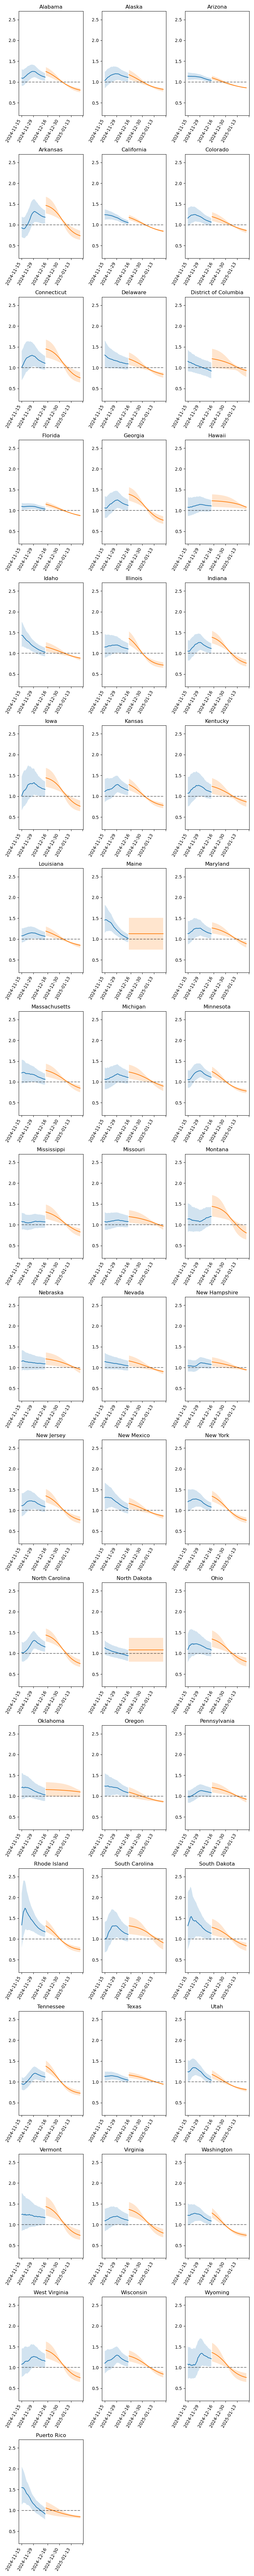

In [86]:

# ---------
rc = main_rc.copy()

do_save_plots = False

with plt.rc_context(rc):
    
#     # ----TEST
#     state_name = "California"
    use_states = obj.rt_past_df.index.get_level_values("location_name").unique()
    num_states = len(use_states)
    fig, axes = vis.make_axes_seq(num_states, total_width=8., ax_height=4.5)
    mpl_figs.append(fig)
    
    for i_ax, state_name in enumerate(use_states):
        ax = axes[i_ax]

        rt_past = obj.rt_past_df.xs(state_name, level="location_name").iloc[1:]
        rt_fore = obj.rt_fore_df.xs(state_name, level="location_name")

        # R(t) past
        ax.plot(rt_past["rt_past_median"])
        ax.fill_between(
            rt_past.index,
            rt_past["rt_past_low_q"],
            rt_past["rt_past_high_q"],
            alpha=0.2
        )

        # R(t) fore
        ax.plot(rt_fore["rt_fore_median"])
        ax.fill_between(
            rt_fore.index,
            rt_fore["rt_fore_low_q"],
            rt_fore["rt_fore_high_q"],
            alpha=0.2
        )
        # Reference lines
        ax.plot([rt_past.index[0], rt_fore.index[-1]], [1., 1.], "k--", alpha=0.5)

        # Extra
        ax.set_title(state_name)
        ax.set_ylim(0.2, 2.7)
        ax.xaxis.set_major_locator(mpl.dates.AutoDateLocator())
        vis.rotate_ax_labels(ax)
    
    fig.tight_layout()
    
    if do_save_plots:
        fig.savefig(f"tmp_figs/rt_states.pdf")
    

# Tests - View categorical rate change forecasts

[Back to run](#run-forecast)

In [6]:
# #-- -- - Load submittable file


fore_df = pd.read_csv(
    "forecast_out/latest.csv", 
#     "forecast_out/APAGAR_latest_pre-horizon-change.csv", 
#     "forecast_out/tests/old_forecast_test.csv", 
    parse_dates=["reference_date", "target_end_date"])

color_map = plt.get_cmap("RdYlGn")
color_i_seq = np.array([1.00, 0.75, 0.50, 0.25, 0.00])

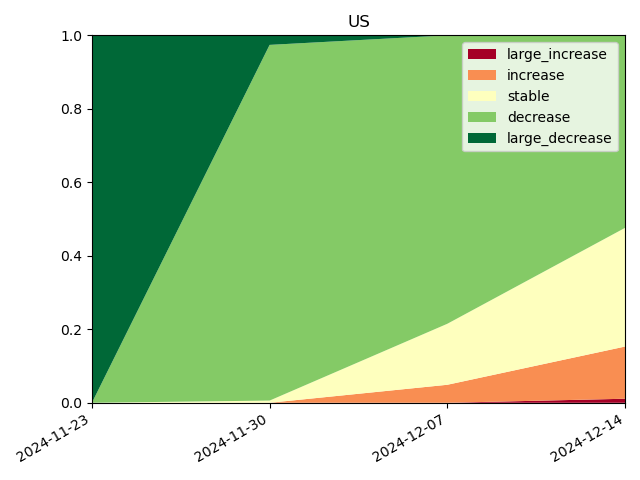

In [23]:
state_name = "US" # "Illinois"

# ----------
# -! NOTE will need to read the population file to convert between state ID and name

# # -()- "Decrease" as base
# rate_change_names = [
#     "large_decrease", "decrease", "stable", "increase", "large_increase"]
# color_i_seq = np.array([1.00, 0.75, 0.50, 0.25, 0.00])

# -()- "Increase" as base (looks better, as moving to "increase" is actually an increasing curve)
rate_change_names = [
    "large_increase", "increase", "stable", "decrease", "large_decrease"]
color_i_seq = np.array([0.0, 0.25, 0.50, 0.75, 1.0])


rate_change_id = {name: i for i, name in enumerate(rate_change_names)}  # Signature: r[i] = name


# ---------------

# -! TODO: also a version that aggregates some levels.

# --- Select data (state, rate change)
df = fore_df.loc[
      (fore_df["location"] == truth.state_name_to_id[state_name])
    & (fore_df["target"] == "wk flu hosp rate change")
    & (fore_df["output_type"] == "pmf")
]


# --- Convert values into a 2D table 
df.set_index(["output_type_id", "target_end_date"], inplace=True)
df.reindex()

value_table = df["value"].unstack("target_end_date").loc[rate_change_names]
#  ^  ^  Signature: df.loc[output_type_id, target_end_date]

# --------------- PLOT

rc = dict()
rc["axes.prop_cycle"] = mpl.cycler(color=color_map(color_i_seq))

with mpl.rc_context(rc):
    fig, ax = plt.subplots()

    ax.stackplot(value_table.columns, value_table, labels=rate_change_names)
    
    # TODO: set locator
    ax.legend()
    ax.set_title(state_name)
    ax.set_xlim(value_table.columns[0], value_table.columns[-1])
    ax.set_ylim(0., 1.0)
    
    ax.xaxis.set_major_locator(mpl.dates.WeekdayLocator(5))
    
    vis.rotate_ax_labels(ax, angle=30)
    fig.tight_layout()

In [10]:
# value_table.sort_index(axis=0, key=lambda s: rate_change_id[s])
value_table.loc[rate_change_names]

target_end_date  2024-01-27  2024-02-03  2024-02-10  2024-02-17
output_type_id                                                 
large_increase        0.000       0.000       0.000       0.000
increase              0.000       0.000       0.000       0.000
stable                0.002       0.021       0.022       0.011
decrease              0.579       0.543       0.947       0.805
large_decrease        0.419       0.436       0.031       0.184

----